

#Import All Required Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings


warnings.filterwarnings('ignore')

#Importing Datasets

In [2]:
df1=pd.read_csv('forest1.csv')
df2=pd.read_csv('forest2.csv')

#Identifying the dataypes of different columns


In [3]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [5]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


#Creating a single dataset by assigning Regions

In [7]:
df1['Region'] = 1
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [8]:
df2['Region'] = 2
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,2
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2


In [9]:
df = pd.concat([df1, df2], ignore_index=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


**OVERALL ANALYSIS**

The dataset contains **15 columns** and **244 rows**, representing meteorological and environmental observations across different regions and time periods. The data types are distributed as follows:

Integer columns (7): day, month, year, Temperature, RH, Ws, and Region — these capture date information and basic weather parameters such as temperature, relative humidity, wind speed, and the region code.

Float columns (5): Rain, FFMC, DMC, ISI, and BUI — these represent continuous meteorological indices used in fire weather modeling.

Object columns (3): DC, FWI, and Classes — among these, DC and FWI are likely numerical values stored as text that should be converted to float, while Classes indicates the categorical fire occurrence label.

Notably, the Classes column has one missing entry (243 non-null), which may require imputation or removal during preprocessing.

#Converting to proper datatype

In [11]:
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


#Descriptive Statistics of the Columns


In [13]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.430864,4.774180,16.664754,7.035391,1.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.665606,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,69.100000,7.300000,22.525000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


#Identifying & Handling Missing Values

In [14]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100


missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_df

,Missing Count,Missing Percentage
DC,1,0.409836
FWI,1,0.409836
Classes,1,0.409836
day,0,0.000000
month,0,0.000000
year,0,0.000000
Temperature,0,0.000000
RH,0,0.000000
Ws,0,0.000000
Rain,0,0.000000


**Since there is only one missing value in 3 features, we can safely ignore it without affecting the data much**

In [15]:
df.dropna(inplace=True)
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#Identifying & Handling Duplicate Values

In [16]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

df.drop_duplicates(inplace=True)

df.shape

Number of duplicate rows: 0


(243, 15)

#Identifying columns inconsistency

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))



--- day ---
day
1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
Name: count, dtype: int64

--- month ---
month
8    62
7    61
6    60
9    60
Name: count, dtype: int64

--- year ---
year
2012    243
Name: count, dtype: int64

--- Temperature ---
Temperature
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
27     8
Name: count, dtype: int64

--- RH ---
RH
64    10
55    10
58     8
54     8
78     8
68     7
66     7
73     7
80     7
65     7
Name: count, dtype: int64

--- Ws ---
Ws
14    43
15    40
13    30
17    28
16    27
18    25
19    15
21     8
11     7
12     7
Name: count, dtype: int64

--- Rain ---
Rain
0.0    133
0.1     18
0.2     11
0.3     10
0.4      8
0.7      6
0.6      6
0.5      5
1.1      3
1.2      3
Name: count, dtype: int64

--- FFMC ---
FFMC
88.9    7
89.4    5
89.3    4
85.4    4
89.1    4
78.3    3
88.1    3
88.3    3
47.4    3
79.9    3
Name: count, dtype: int64

--- DMC ---
DMC
7.9     5
12.

In [20]:
df['Classes']=df['Classes'].str.strip()
df['Classes']=df['Classes'].map({'fire':1,'not fire':0})
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

#Identifying and handling Outliers

In [21]:
def count_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outlier_counts = {col: count_iqr_outliers(df[col]) for col in df.select_dtypes(include=['number'])}
pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

,Outlier Count
day,0
month,0
year,0
Temperature,2
RH,0
Ws,8
Rain,35
FFMC,13
DMC,12
DC,14


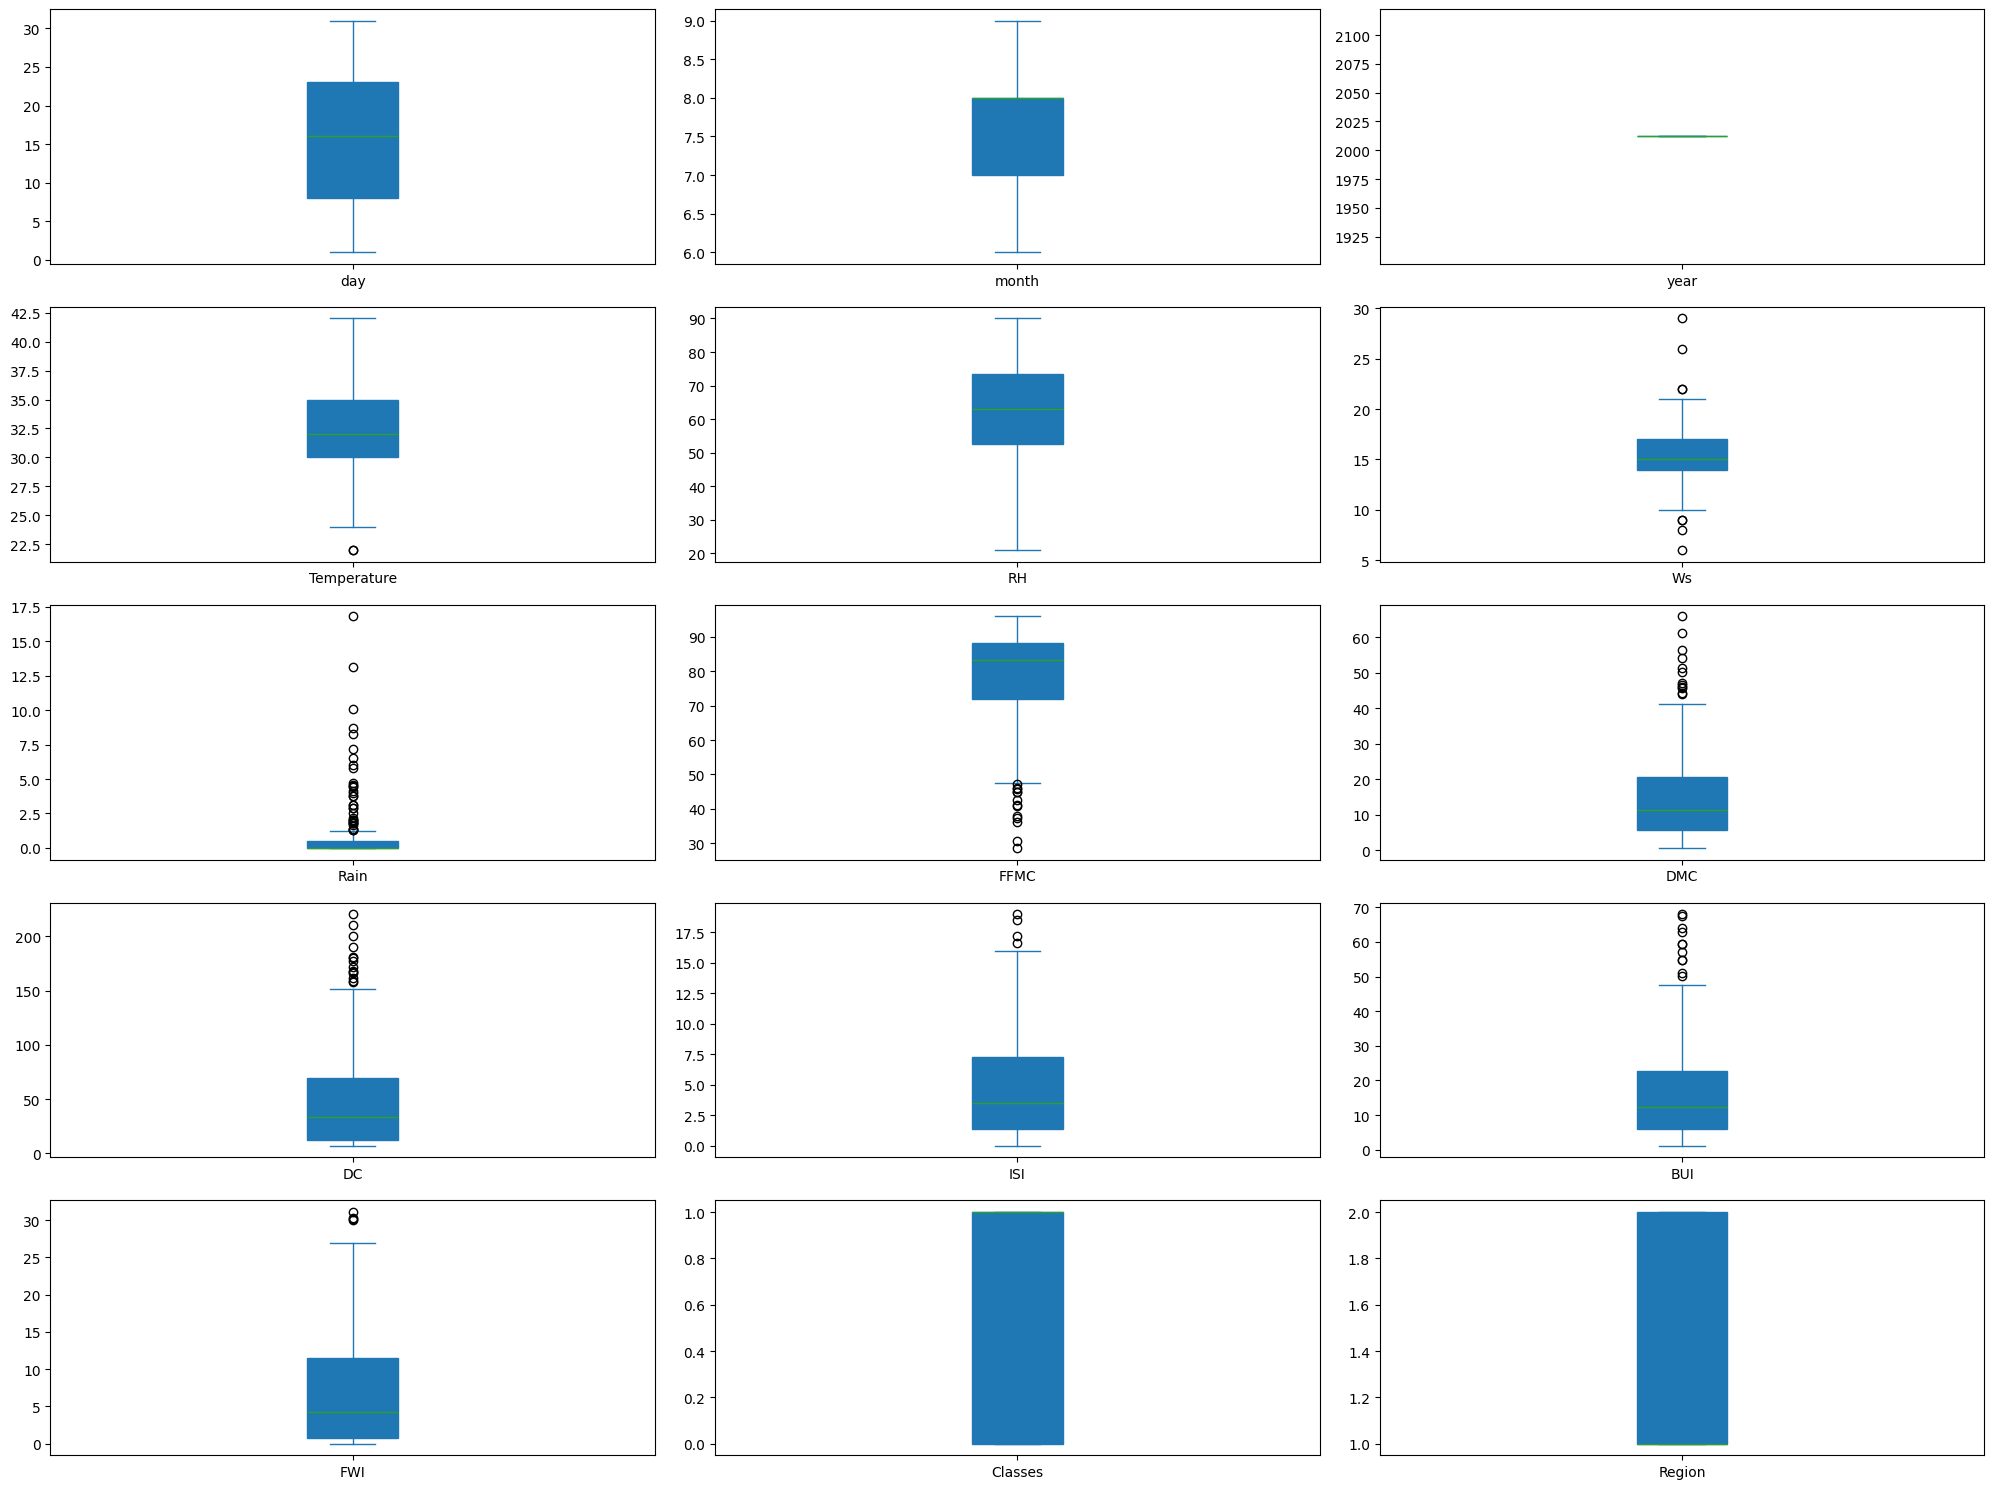

In [22]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,15), patch_artist=True)
plt.tight_layout()
plt.show()

**Seems there are outliers according to the IQR method. But we are not sure of it yet if we should remove these. As we have a problem with detection outliers itself i.e forest fires which happend rarely, we decided not to do anything for these outliers that we got from IQR method**

#Checking the Distribution of the Dataset

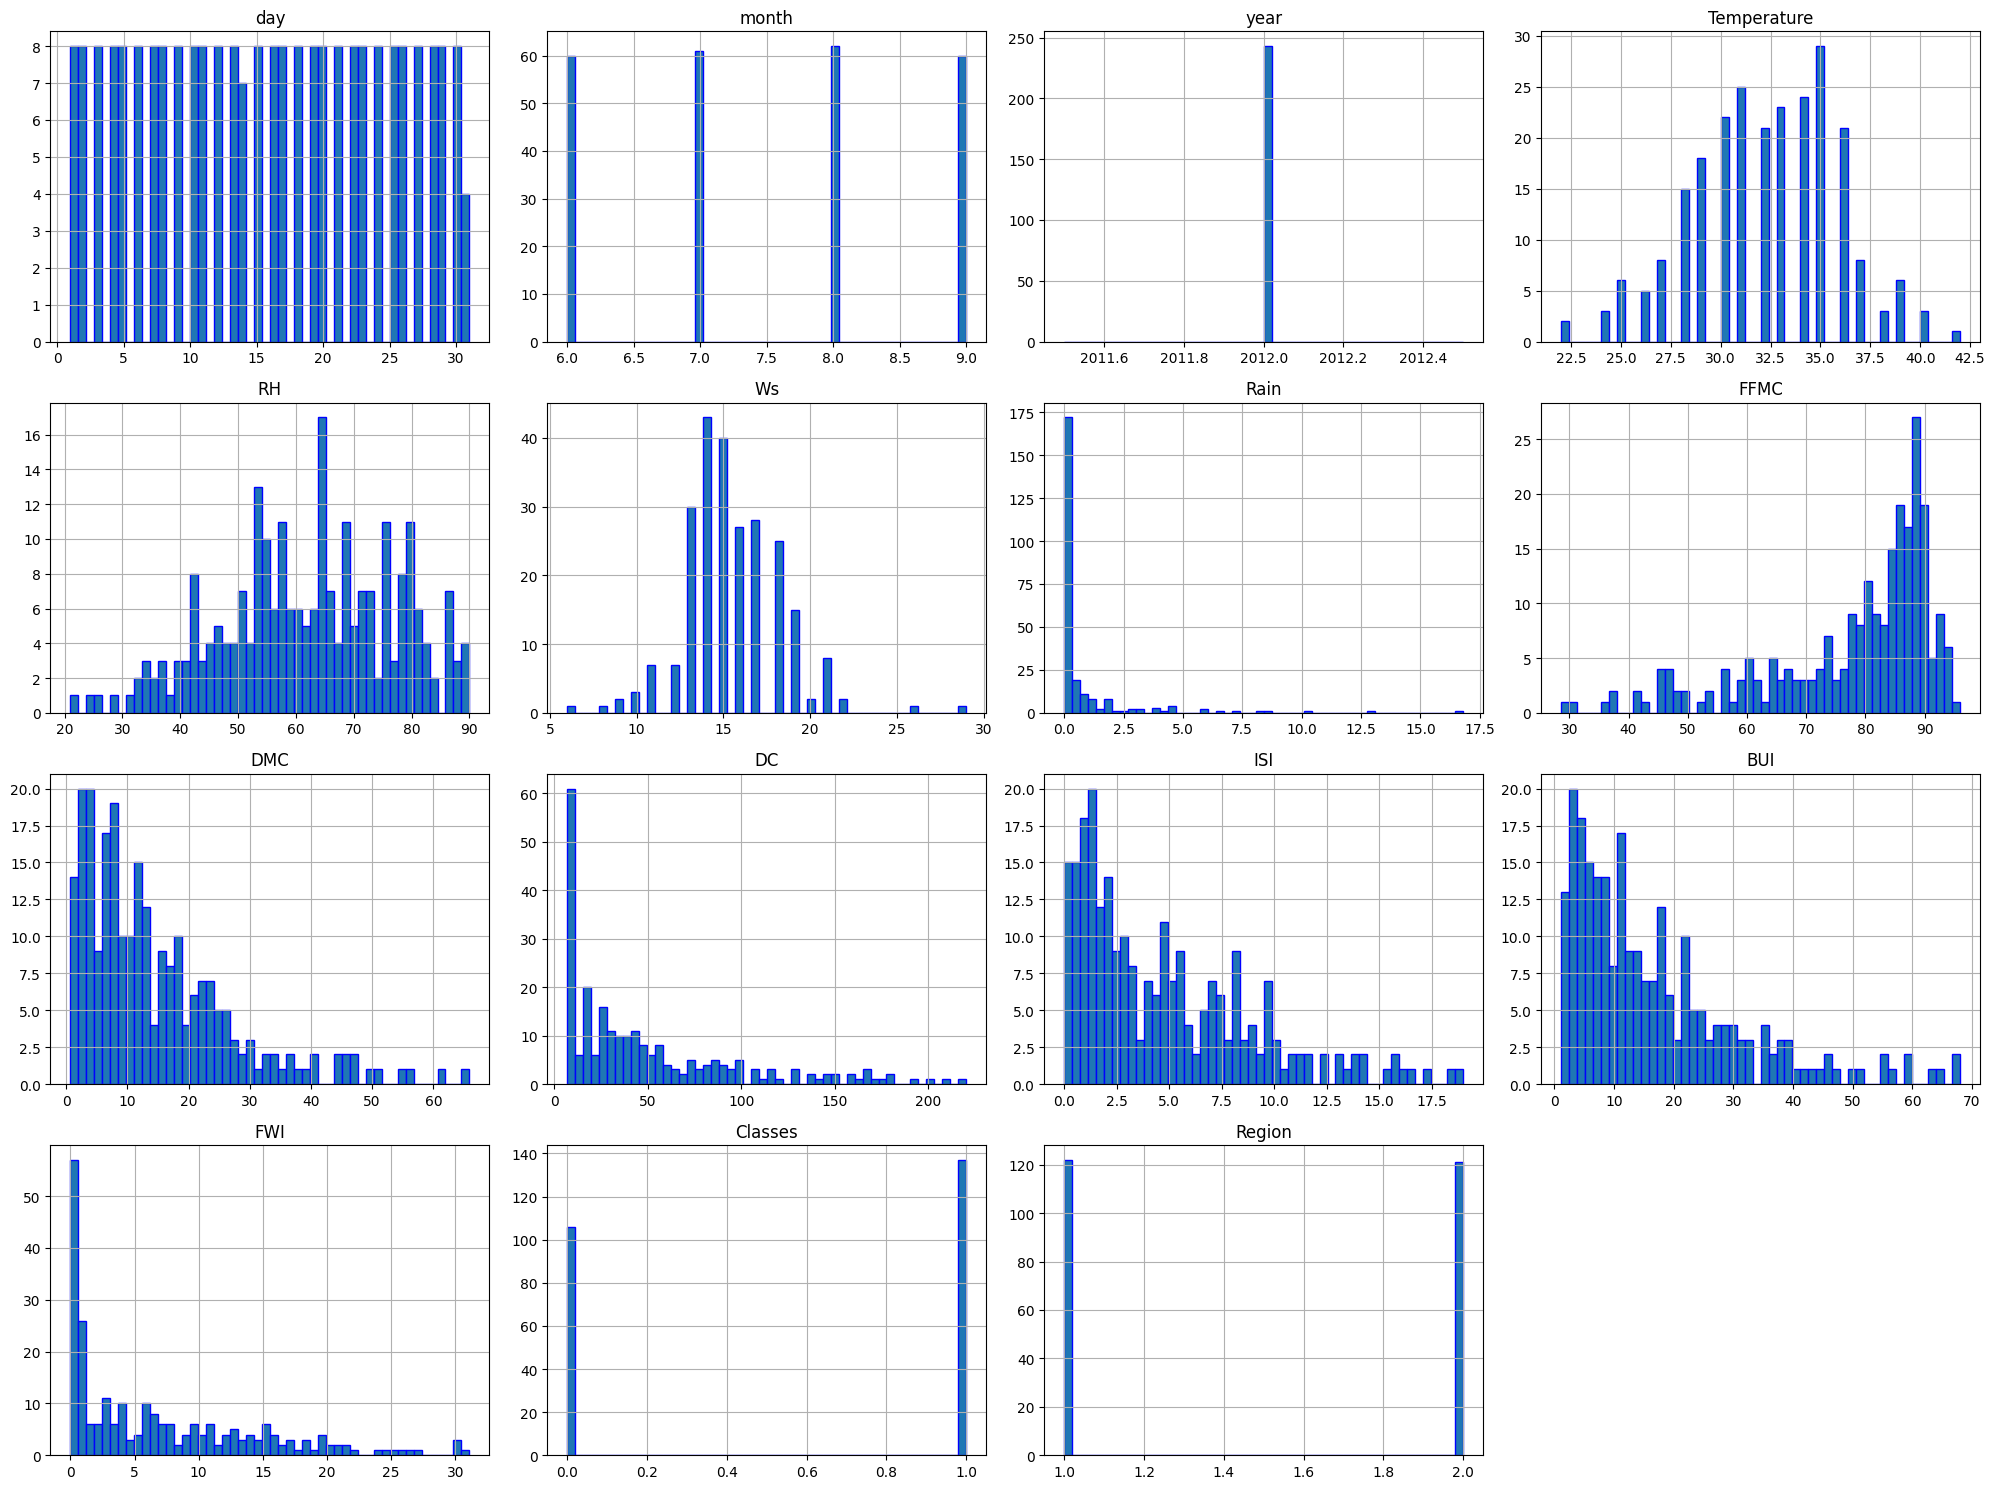

In [23]:
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.title("Distibution of Dataset",fontsize=13)
plt.tight_layout()
plt.show()


**day**: This is uniformly distributed, it itself is usually a weak predictor of forest fires (day 5 isn't inherently more dangerous than day 25). It can be dropped.

**month**: This is a categorical feature with four distinct values (June, July, August, September). This is a strong and important feature as it captures the seasonal progression of fire danger (e.g., August is typically hotter and drier than June).

**year**: This is a constant feature (all 2012). It has zero variance and provides no predictive information. It must be dropped.

**Temperature**: This feature is normally distributed, centered around 32-35°C. This is a stable predictor for most models.

**Rain**: This is highly right-skewed and zero-inflated. The vast majority of entries are 0.0 (no rain), which is typical for a fire season. The presence (Rain > 0) vs. absence (Rain = 0) of rain is likely a more powerful predictor than the specific amount.

**FFMC (Fine Fuel Moisture Code)**: This is strongly left-skewed. Most values are very high (80-95), indicating that surface fuels (grass, leaves) are very dry and highly combustible on most days.

**DMC (Duff Moisture Code)**: This is right-skewed. Most values are low, meaning the deeper duff layer is often moist. The long tail of high values represents extended dry periods where this deep fuel dries out, leading to more intense fires.

**DC (Drought Code)**: This is highly right-skewed with a very long tail. Most values are low (0-50), indicating that severe, long-term drought is uncommon. The long tail (past 200) represents rare but critical periods of extreme drought, which would make fires much more intense and difficult to control.

**ISI (Initial Spread Index)**: This is right-skewed. Similar to wind speed, most days have a low potential for fire spread, but a few days have a very high potential, which is critical to predict.

**BUI (Buildup Index)**: This is right-skewed and looks similar to DMC. It represents the total fuel available for combustion and shows that while this is low on most days, it can build up significantly during dry spells.

**FWI (Fire Weather Index)**: This is highly right-skewed. As the final composite index representing total fire intensity, this distribution shows that most days have a low-to-moderate fire risk (values 0-10). The long tail represents the few critical days with very high fire danger.

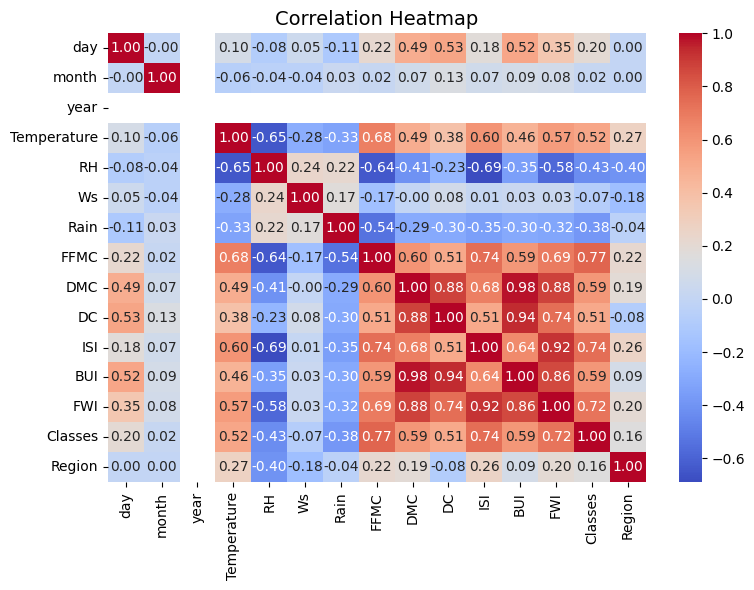

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True).round(2),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


**Correlation with Target (Classes)**
**High Positive Correlation:** FFMC (0.77), ISI (0.74), FWI (0.72), DMC (0.59), and DC (0.51) all have a strong-to-moderate positive relationship. As these values go up, the chance of fire goes up.

**Moderate/Low Negative Correlation:** RH (-0.43) and Rain (-0.38) have a moderate-to-low negative relationship. As these values go up (more humidity or rain), the chance of fire goes down.

**Very Low / No Correlation:** Temperature (0.20), day (0.20), Region (0.16), Ws (0.07), month (0.02), year (-0.00).


**Multicollinearity (Correlation Between Predictors)**

**Extremely High Correlation (Redundant):**

**BUI and DMC (0.98):** Nearly identical. Can be dropped.

**BUI and DC (0.94):** Nearly identical.

**FWI and ISI (0.92):** FWI is heavily dependent on ISI.

**DC and DMC (0.88):** Extremely high correlation.

**FWI and BUI (0.86):** Extremely high correlation.

**ISI and FFMC (0.74):** Very high correlation.

**FWI and DC (0.74):** Very high correlation.

**High-to-Moderate Correlation:**

**FWI and FFMC (0.69)**

**DMC and ISI (0.68)**

**FFMC and RH (-0.64)**

**DMC and FFMC (0.60)**

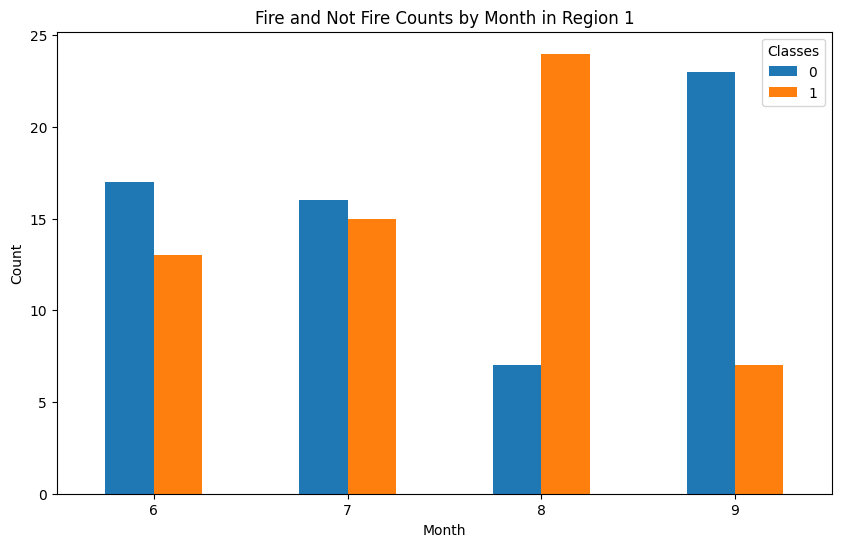

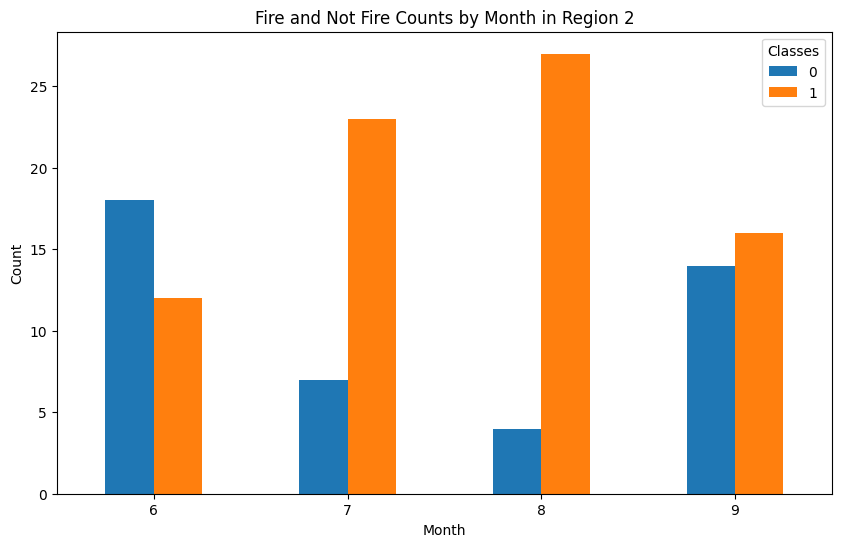

In [25]:
fire_counts_monthly = df.groupby(['Region', 'month', 'Classes']).size().unstack(fill_value=0)

fire_counts_monthly.loc[1].plot(kind='bar', figsize=(10, 6))
plt.title('Fire and Not Fire Counts by Month in Region 1')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.show()

fire_counts_monthly.loc[2].plot(kind='bar', figsize=(10, 6))
plt.title('Fire and Not Fire Counts by Month in Region 2')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.show()

**Months 7 and 8 seems to have more higher chances of fire**

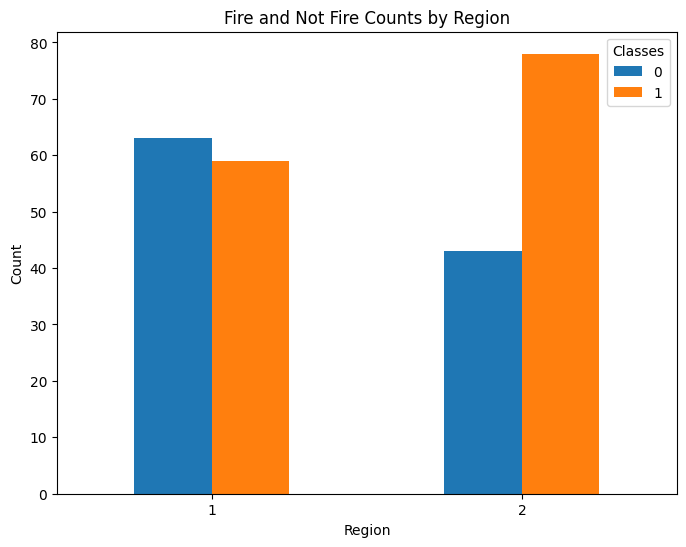

In [26]:
fire_counts = df.groupby(['Region', 'Classes']).size().unstack(fill_value=0)

fire_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Fire and Not Fire Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.show()

**Region 2 has more fires as compared to region Region 1**

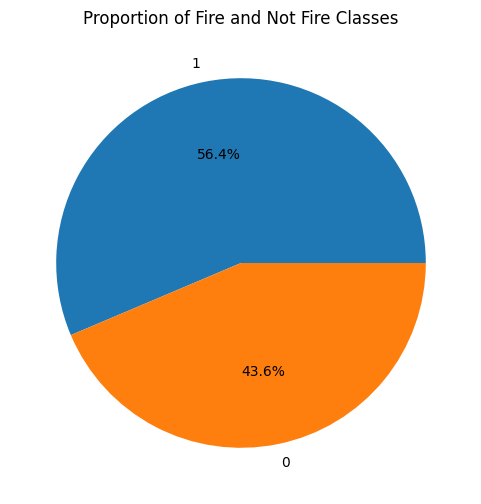

In [27]:
class_counts = df['Classes'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Fire and Not Fire Classes')
plt.show()

In [28]:
df.drop(['day','FWI','BUI','DC','ISI','DMC','year'], axis=1, inplace=True)

#Splitting dataset

In [29]:
X = df.drop('Classes',axis=1)
y= df['Classes']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

#Model Training

In [30]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM Classifier": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_val)
    y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"{name}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}\n")

results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)
print("\nModel Performance Comparison")
print(results_df)


Logistic Regression
Accuracy : 0.9388
Precision: 0.9286
Recall   : 0.9630
F1-Score : 0.9455
ROC-AUC  : 0.9966

K-Nearest Neighbors
Accuracy : 0.7551
Precision: 0.7586
Recall   : 0.8148
F1-Score : 0.7857
ROC-AUC  : 0.8577

Decision Tree
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000
ROC-AUC  : 1.0000

Random Forest
Accuracy : 0.9592
Precision: 0.9630
Recall   : 0.9630
F1-Score : 0.9630
ROC-AUC  : 0.9949

SVM Classifier
Accuracy : 0.8367
Precision: 0.8276
Recall   : 0.8889
F1-Score : 0.8571
ROC-AUC  : 0.9512

XGBoost
Accuracy : 0.9592
Precision: 0.9630
Recall   : 0.9630
F1-Score : 0.9630
ROC-AUC  : 0.9966


Model Performance Comparison
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Decision Tree        1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest        0.959184   0.962963  0.962963  0.962963  0.994949
XGBoost              0.959184   0.962963  0.962963  0.962963  0.996633
Logistic Regression  0.938776   0.928571  0.96296

In [31]:
X = df.drop('Classes', axis=1)
y = df['Classes']

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM Classifier": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'), # Added eval_metric
}

results = {}

cv_strategy = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

print("Running Cross-Validation...")

for name, model in models.items():

    pipeline = Pipeline(steps=[
        ('preprocessor', StandardScaler()),
        ('classifier', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=cv_strategy, scoring='f1', n_jobs=-1)

    results[name] = {
        'F1-Mean': scores.mean(),
        'F1-StdDev': scores.std()
    }

    print(f"{name}: Mean F1-Score = {scores.mean():.4f} (StdDev = {scores.std():.4f})")

results_df = pd.DataFrame(results).T.sort_values(by='F1-Mean', ascending=False)
print("\nModel Performance Comparison (Cross-Validated)")
print(results_df)

Running Cross-Validation...
Logistic Regression: Mean F1-Score = 0.9537 (StdDev = 0.0366)
K-Nearest Neighbors: Mean F1-Score = 0.8725 (StdDev = 0.0566)
Decision Tree: Mean F1-Score = 0.9779 (StdDev = 0.0332)
Random Forest: Mean F1-Score = 0.9721 (StdDev = 0.0294)
SVM Classifier: Mean F1-Score = 0.9338 (StdDev = 0.0476)
XGBoost: Mean F1-Score = 0.9743 (StdDev = 0.0326)

Model Performance Comparison (Cross-Validated)
                      F1-Mean  F1-StdDev
Decision Tree        0.977908   0.033206
XGBoost              0.974289   0.032569
Random Forest        0.972101   0.029436
Logistic Regression  0.953735   0.036642
SVM Classifier       0.933758   0.047565
K-Nearest Neighbors  0.872473   0.056556


       Feature  Importance
5         FFMC    0.564866
4         Rain    0.214897
1  Temperature    0.094543
2           RH    0.073858
3           Ws    0.026215
0        month    0.017553
6       Region    0.008069


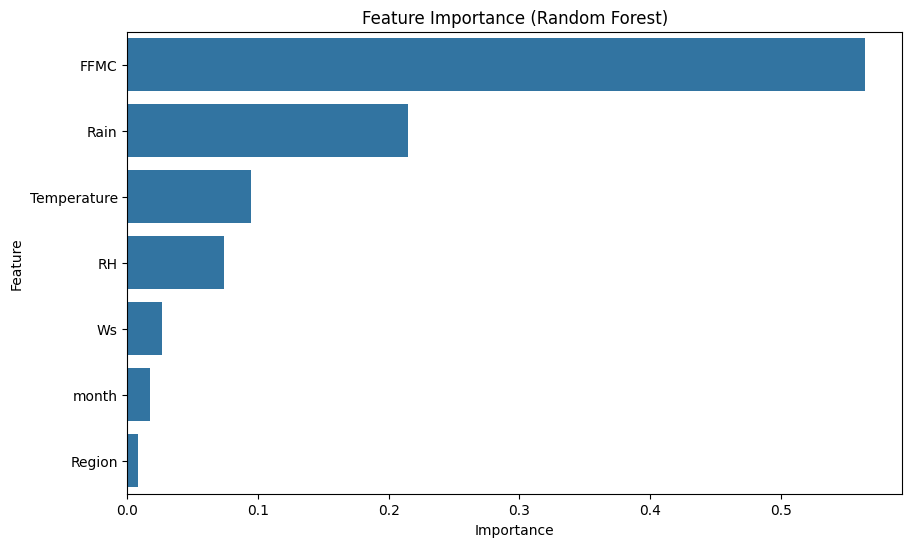

In [32]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

final_pipeline.fit(X, y)

feature_names = X.columns

importances = final_pipeline.named_steps['classifier'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

       Feature  Importance
5         FFMC    0.864132
3           Ws    0.057989
4         Rain    0.051161
1  Temperature    0.015447
2           RH    0.011271
0        month    0.000000
6       Region    0.000000


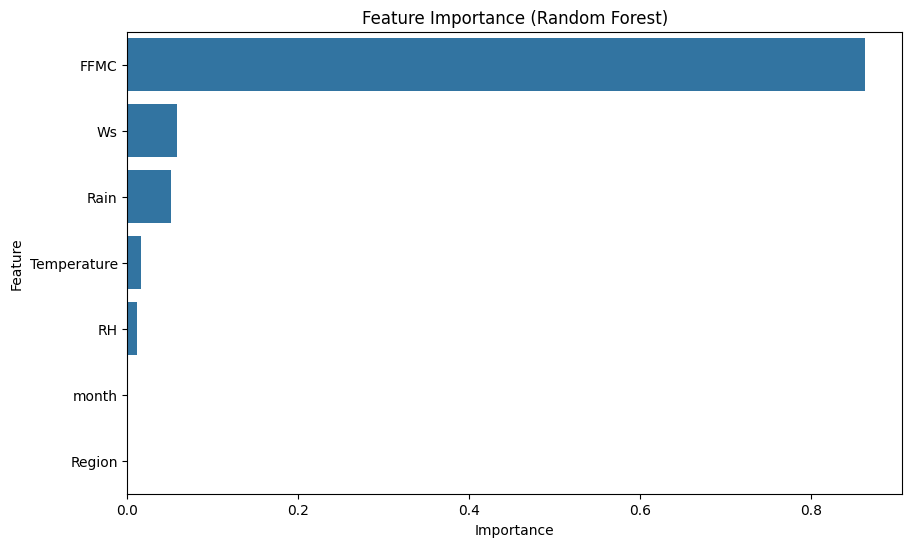

In [33]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

final_pipeline.fit(X, y)

feature_names = X.columns

importances = final_pipeline.named_steps['classifier'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()